<a href="https://colab.research.google.com/github/AlexHudnev/data_analysis/blob/main/data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('/content/drive/My Drive/home_data.csv', index_col=0)

data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Text(0.5, 1.0, 'Price by sqft_lot')

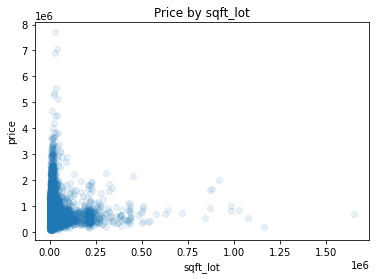

In [4]:
sqft_lot = data['sqft_lot'].values
price = data['price'].values

plt.scatter(sqft_lot, price, alpha=0.1)

plt.xlabel('sqft_lot')
plt.ylabel('price')
plt.title('Price by sqft_lot')

Молодые люди оказываются сильнее

Text(0.5, 1.0, 'Price by condition')

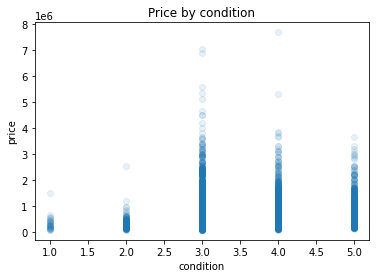

In [6]:
condition = data['condition'].values
price = data['price'].values

plt.scatter(condition, price, alpha=0.1)

plt.xlabel('condition')
plt.ylabel('price')
plt.title('Price by condition')

Text(0, 0.5, 'price')

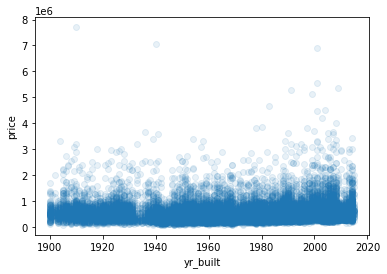

In [7]:
yr_built = data['yr_built'].values
price = data['price'].values

plt.scatter(yr_built, price, alpha=0.1)

plt.xlabel('yr_built')
plt.ylabel('price')

Text(0.5, 1.0, 'Price by sqft_living')

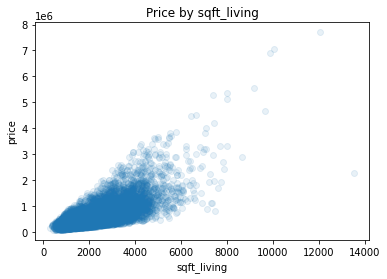

In [8]:
sqft_living = data['sqft_living'].values
price = data['price'].values

plt.scatter(sqft_living, price, alpha=0.1)

plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Price by sqft_living')

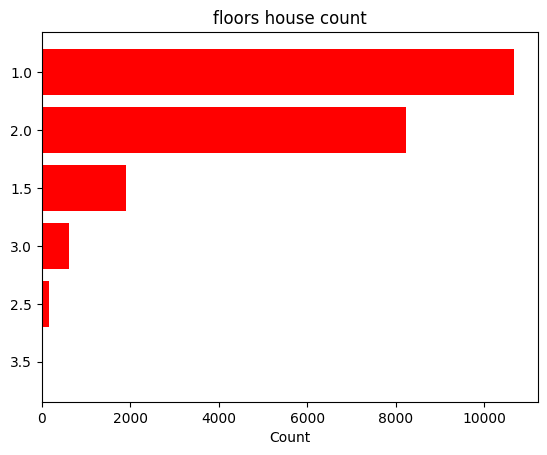

In [16]:
floors_data = np.unique(data.floors.values, return_counts=True)  
floors_data_count = len(floors_data[0]) 

plt.rcdefaults()
fig, ax = plt.subplots()

df = pd.DataFrame({
                  'floors': floors_data[0],
                  'counts': floors_data[1]
                  }).sort_values(by=['counts'])

floors = df.floors[::-1]
counts = df.counts[::-1]

positions = np.arange(floors_data_count)

ax.barh(positions, counts, align='center', color='red')
ax.set_yticks(positions)
ax.set_yticklabels(floors)
ax.invert_yaxis()  
ax.set_xlabel('Count')
ax.set_title('floors house count')

plt.show()